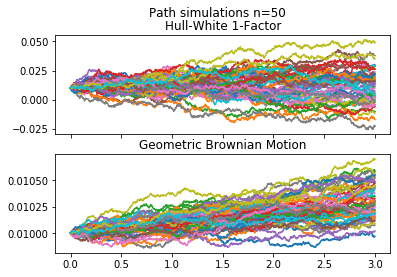

In [1]:
%config IPCompleter.greedy = True
from QuantLib import *
import numpy as Numpy
import matplotlib.pyplot as Matplotlib

# process = QuantLib 1-dimensional stochastic process object
def GeneratePaths(process, maturity, nPaths, nSteps):
    generator = UniformRandomGenerator()
    sequenceGenerator = UniformRandomSequenceGenerator(nSteps, generator)
    gaussianSequenceGenerator = GaussianRandomSequenceGenerator(sequenceGenerator)
    paths = Numpy.zeros(shape = ((nPaths), nSteps + 1))
    pathGenerator = GaussianPathGenerator(process, maturity, nSteps, gaussianSequenceGenerator, False)
    for i in range(nPaths):
        path = pathGenerator.next().value()
        paths[i, :] = Numpy.array([path[j] for j in range(nSteps + 1)])
    return paths


# general parameters and objects
tradeDate = Date(23, November, 2018)
Settings_instance().evaluationDate = tradeDate
dayCounter = Actual360()
calendar = UnitedStates()
settlementDate = calendar.advance(tradeDate, 2, Days)

# common simulation-related parameters for all processes
maturity = 3.0
nPaths = 50
nSteps = int(maturity * 365)
timeGrid = Numpy.linspace(0.0, maturity, nSteps + 1)

# create HW1F model, request paths from generator
reversionSpeed = 0.05
rateVolatility = 0.0099255
r = QuoteHandle(SimpleQuote(0.01))
curve = RelinkableYieldTermStructureHandle(FlatForward(settlementDate, r, dayCounter))
HW1F = HullWhiteProcess(curve, reversionSpeed, rateVolatility)
hw1f_paths = GeneratePaths(HW1F, maturity, nPaths, nSteps)

# create GBM model, request paths from generator
initialValue = 0.01
mue = 0.01
sigma = 0.0099255
GBM = GeometricBrownianMotionProcess(initialValue, mue, sigma)
gbm_paths = GeneratePaths(GBM, maturity, nPaths, nSteps)

# plot all paths for the both processes
f, subPlots = Matplotlib.subplots(2, sharex = True)
Matplotlib.rcParams['figure.figsize'] = [16.0, 10.0]
f.suptitle('Path simulations n=' + str(nPaths))
subPlots[0].set_title('Hull-White 1-Factor')
subPlots[1].set_title('Geometric Brownian Motion')

for i in range(hw1f_paths.shape[0]):
    path = hw1f_paths[i, :] 
    subPlots[0].plot(timeGrid, path)

for i in range(gbm_paths.shape[0]):
    path = gbm_paths[i, :] 
    subPlots[1].plot(timeGrid, path)